<a href="https://colab.research.google.com/github/nurnaff/ColabGoogle/blob/master/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://i.imgur.com/XoRDxQJ.png" align = "center">

###Reference


*   https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
*   https://stackabuse.com/k-means-clustering-with-scikit-learn/



###Introduction

K-Means Clustering is an unsupervised machine learning algorithm. In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data.

The real world applications of K-Means include:

*   customer profiling
*   market segmentation
*   computer vision
*   search engines
*   astronomy

###How It Works

1.   Select K (i.e. 2) random points as cluster centers called centroids
![alt text](https://miro.medium.com/max/1610/1*EW-5MNBE3mxHS90KIBEAtQ.png)

2.   Assign each data point to the closest cluster by calculating its distance with respect to each centroid
![alt text](https://miro.medium.com/max/1590/1*6jruJmmnxtSOj4cuwv91Hg.png)

3.  Determine the new cluster center by computing the average of the assigned points
![alt text](https://miro.medium.com/max/1584/1*blMy7iRv9R2ceDD2XILjbQ.png)

4.  Repeat steps 2 and 3 until none of the cluster assignments change
![alt text](https://miro.medium.com/max/1632/1*GVQnG8FnP4L6jbHsO3oWOQ.png)



###Choosing The Right Number of Clusters

Although k-means worked well on this toy dataset, it is important to reiterate that a drawback of k-means is that we have to specify the number of clusters, k,before we know what the optimal k is. The number of clusters to choose may not always be so obvious in real-world applications, especially if we are working with a higher dimensional dataset that cannot be visualized.

The elbow method is a useful graphical tool to estimate the optimal number of clusters k for a given task. Intuitively, we can say that, if k increases, the within-cluster SSE (“distortion”) will decrease. This is because the samples will be closer to the centroids they are assigned to.
The idea behind the elbow method is to identify the value of k where the distortion begins to decrease most rapidly, which will become clearer if we plot the distortion for different values of k:

![alt text](https://miro.medium.com/max/677/1*Q9OzABjrHuY1uFIcEe8tlg.png)

As we can see in the resulting plot, the elbow is located at k = 3, which is evidence that k = 3 is indeed a good choice for this dataset.


###K-Means Clustering using Scikit-Learn

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In this tutorial, we will generate our own data using the make_blobs function from the sklearn.datasets module. The centers parameter specifies the number of clusters.

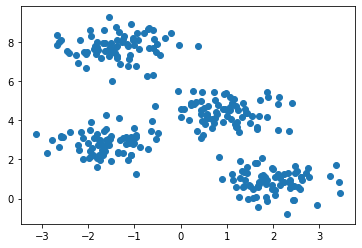

In [0]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

####Determining K with Elbow Method

To get the values used in the graph, we train multiple models using a different number of clusters and storing the value of the *intertia_* property (WCSS=Within Cluster Sum of Square) every time.

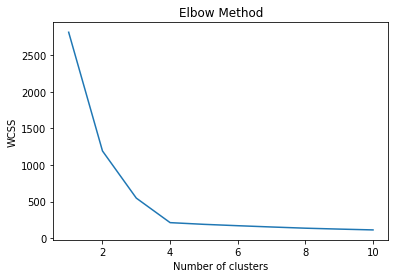

In [0]:
wcss = []
for i in range(1, 11):
    #kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    #for the sake of simplicity, you can just specify the number of cluster
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Next, we categorize the data using the optimum number of clusters (4) we determined in the last step. k-means++ ensures that we get don’t fall into the random initialization trap.

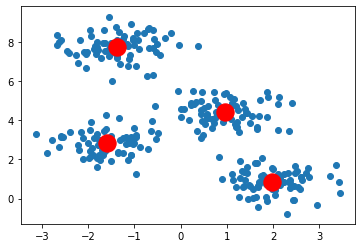

In [0]:
#kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
#for the sake of simplicity, you can just specify the number of cluster
kmeans = KMeans(n_clusters=4)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()